# 1124 cp11

In [ ]:
A = [-3 -4; 4 6; 1 1]
B = [-11 -10 16; 7 8 -11]/9 # one left inverse of A
C = [0 -1 6; 0 1 -4]/2 # Another left inverse of A

In [3]:
# QR factorization
A = randn(3, 3)
inv(A)
using LinearAlgebra
Q, R = qr(A)

Q = Matrix(Q)
inv(R) *Q' # inverse of A

3×3 Matrix{Float64}:
  14.9333  -1.93173   -7.95981
  15.4328  -1.92228  -10.1343
 -26.2211   2.20445   16.3662

In [5]:
# solving linear equation
function back_subst(R,b)
    n = length(b)
    x = zeros(n)
    for i=n:-1:1
        x[i] = (b[i] - R[i,i+1:n]'*x[i+1:n]) / R[i,i]
    end
    return x
end;
R = triu(randn(4,4))  # Random 4x4 upper triangular matrix
b = rand(4);
x = back_subst(R,b);
norm(R*x-b)

# 法2
n = 5000;
A = randn(n,n);  
b = randn(n); 
@time x1 = A\b;

A = tril(randn(n,n));  # random lower triangular matrix
@time x = A\b;
A = randn(n,n);  # random square matrix
@time x = A\b;

  1.144486 seconds (1.82 M allocations: 284.081 MiB, 3.00% gc time, 25.60% compilation time)


In [6]:
# Factor-solve methods for multiple right-hand sides.
n = 5000;
A = randn(n,n); 
B = randn(n,2);
# Solve with right-hand side B[:,1]
@time x1 = A \ B[:,1];
# Solve with right-hand side B[:,2]
@time x2 = A \ B[:,2];
# Naive approach for solving A*X = B
@time X = [ A\B[:,1]  A\B[:,2] ];
# Factor-solve approach
@time X = A \ B;

  0.848486 seconds (46.45 k allocations: 193.256 MiB, 3.41% gc time, 1.26% compilation time)
  0.738319 seconds (9 allocations: 190.850 MiB, 0.65% gc time)
  1.490992 seconds (390.86 k allocations: 402.757 MiB, 0.53% gc time, 2.59% compilation time)
  0.862476 seconds (423.78 k allocations: 212.944 MiB, 18.87% compilation time)


# 11-4 examples: polynomial 

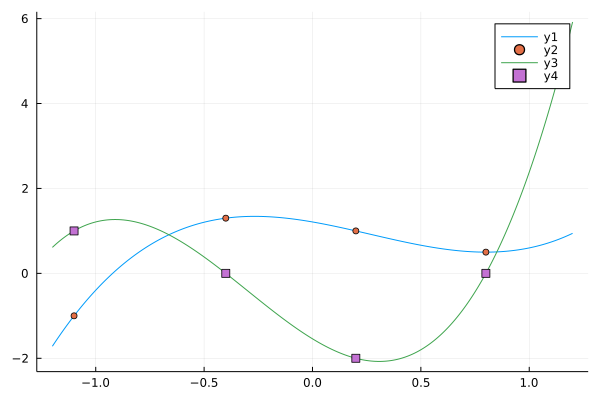

In [8]:
using VMLS
t = [ -1.1, -0.4, 0.2, 0.8 ];
A = vandermonde(t, 4)
b1 = [ -1.0, 1.3, 1.0, 0.5 ];
c1 = A \  b1
b2 = [ 1.0, 0.0, -2.0, 0 ];
c2 = A \ b2
using Plots
ts = linspace(-1.2, 1.2, 1000);
p1 = c1[1] .+ c1[2]*ts + c1[3]*ts.^2 + c1[4]*ts.^3;
plot(ts, p1)
scatter!(t, b1)
p2 = c2[1] .+ c2[2]*ts + c2[3]*ts.^2 + c2[4]*ts.^3;
plot!(ts, p2)
scatter!(t, b2, marker = :square)


In [9]:
# psude inverse
A = [-3 -4; 4 6; 1 1];
pinv(A)
Q, R = qr(A)
Q = Matrix(Q)
R
R \ Q'   # pseudo-inverse from QR factors

2×3 Matrix{Float64}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222

3×1 Matrix{Int64}:
  2
 -1
 -1

In [14]:
1/8

0.125

LinearAlgebra.SingularException: LinearAlgebra.SingularException(4)

# 1025 matrix

In [1]:
A = [1 1 1 1;
     1 1 1 1;
     1 1 1 1]
A[3, 2] # index
a = [1;2;3;4;5;6;7;8;9]
row_cnt, col_cnt = size(A) # size(A, 1) gives row

B = [1 1 1;
     1 1 1;
     1 1 1;
     1 1 1]
# element-wise equality
A == B
A == B'
A .== B'
sum(A .== B')

# matrix slicing with backward seq, (start, gap, end)
A[3:-1:1, 1] 

reshape(A, (4, 3))

# block matrix
C = [0 2 3]
D = [-1]
E = [2 2 1; 1 3 5]
F = [4; 4]
G = [B C;
     D E]

#
a = [[1, 2], [4, 5], [7, 8]]
A = hcat(a...) # a[1], a[2], a[3]
# or 'vcat()'

ArgumentError: ArgumentError: mismatched height in block row 1 (expected 4, got 1)

In [2]:
# special matrix
using LinearAlgebra
zeros(2, 2)
diagm(0 => [1, 2, 3])

identity(dim) = diagm(0 => [1 for i in 1: dim])
identity(3)
diag(identity(3))

# random matrix (norm(0, 100))
rand(2, 3)*10
using SparseArrays
r_index = [1, 2, 2, 1, 4]
c_index = [1, 1, 2, 3, 4]
values = [1, 2, 3, 4, 5]
A = sparse(r_index, c_index, values, 5, 5)

A' # transpose

norm(A)

# element wise multiplication
A .* B
A * B # may warning: dim mismatch

DimensionMismatch: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 5 and 4")

In [3]:
# L
function lower_tri(n)
    U = zeros(n, n)
    for i in 1:n
        for j in 1:i
            U[i, j] = 1
        end
    end
    return U
end
lower_tri(5)

5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  0.0
 1.0  1.0  1.0  1.0  0.0
 1.0  1.0  1.0  1.0  1.0

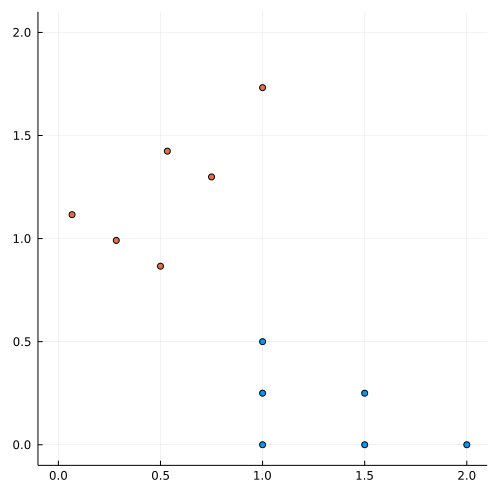

In [4]:
# rotation matrix
Rot(theta) = [cos(theta) -sin(theta);
              sin(theta) cos(theta)]
Rot(pi/3)

points =  [ [1,0], [1.5,0], [2,0], [1,0.25], [1.5, 0.25],[1,.5] ]
rpoints = [ Rot(pi/3)*p for p in points ]

using Plots
scatter([c[1] for c in points], [c[2] for c in points])
scatter!([c[1] for c in rpoints], [c[2] for c in rpoints])
plot!(lims = (-0.1, 2.1), size = (500,500), legend = false)

In [14]:
# reverse matrix
mat = [1 2 3; 4 5 6; 7 8 9]
reverse(mat, dims= 1)
using LinearAlgebra
rev(n) = reverse(Matrix(I, n, n), dims = 1)
rev(5)

x = [1, 2, 3, 4, 5]
rev(5) * x

rev(5) * x == reverse(x)

# Permutation matrix
per = [0 0 1; 1 0 0; 0 1 0]
x = [0.2, -1.7, 2.4]
per * x

per * x == x[[3, 1, 2]]

true

In [20]:
# conv: 求多項式相乘的係數！
#Pkg.add("DSP")
using DSP
a = [1,1];
b = [2,-1,1];  c = [1,1,-2]; 
d = conv(conv(a,b),c)

6-element Vector{Int64}:
  2
  3
 -3
 -1
  1
 -2

* 8.1 Linear and Affine Function

In [2]:
A = [-0.1 2.8 -1.6;
     2.3 -0.6 -3.6]
f(x) = A*x
x = [1 ,2, 3]
y = [-3, -1, 2]
alpha = 0.5
beta = -1.6

lhs = f(alpha*x + beta*y)
rhs = alpha*f(x) + beta*f(y)
f(alpha*x + beta*y) == alpha*f(x) + beta*f(y)
using LinearAlgebra
norm(lhs - rhs)
# if f is not linear, e.g. f is an absolute function i.e. abs.(x)

0.0

In [3]:
# demean matrix
x = [0.2, 2.3, 1.0]
demean_mat = Matrix(I, length(x), length(x)) .- 1/length(x)
de_mean(dim) = Matrix(I, dim, dim) .- 1/dim
de_mean(length(x))*x

using Statistics
x .- mean(x)

3-element Vector{Float64}:
 -0.9666666666666666
  1.1333333333333335
 -0.16666666666666652

In [1]:
using LinearAlgebra
f(x) = [ norm(x-a), norm(x-b) ]
Df(z) = [ (z-a)' / norm(z-a) ;   (z-b)' / norm(z-b) ]
f_taylor(x) = f(z) + Df(z)*(x-z)
a = [1, 0];  b = [1, 1];  z = [0, 0];

f([0.1, 0.1])
f_taylor([0.1, 0.1])

f([0.5, 0.5])
f_taylor([0.5, 0.5])

2-element Vector{Float64}:
 0.5
 0.7071067811865477

In [6]:
# regression Model
beta = [148.73, -18.85]
v = 54.40
using VMLS
D = house_sales_data()
yd = D["price"]
N = length(yd)
X = [D["area"] D["beds"]]

ydhat = X*beta .+ v
rd = yd - ydhat
rms(rd)

74.84571862623018

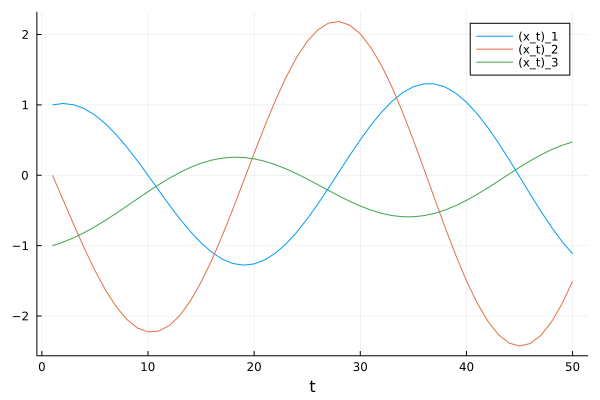

In [7]:
# linear dynamic system
x_1 = [1,0,-1];  # initial state
n = length(x_1);  T = 50;
A = [ 0.97 0.10 -0.05 ; -0.3 0.99 0.05 ; 0.01 -0.04 0.96 ];
state_traj = [x_1 zeros(n,T-1) ];
for t=1:T-1  # Dynamics recursion
    state_traj[:,t+1] = A*state_traj[:,t];
end
using Plots
plot(1:T, state_traj', xlabel = "t",label = ["(x_t)_1" "(x_t)_2" "(x_t)_3"])


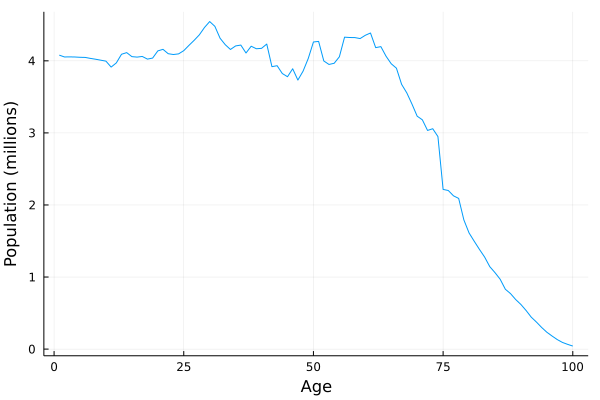

In [9]:
# population dynamic
using VMLS
D = population_data();
b = D["birth_rate"];
d = D["death_rate"];
A = [b'; diagonal(1 .- d[1:end-1])  zeros(length(d)-1)];
x = D["population"]
A

for k = 1:10
    global x
    x = A*x;
end
using Plots
plot(x, legend=false, xlabel = "Age",ylabel = "Population (millions)")

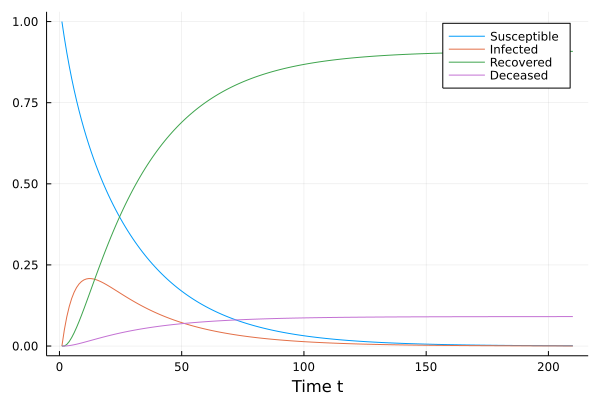

In [10]:
# epidemic dynamics
T = 210;
A = [ 0.95 0.04 0 0 ; 0.05 0.85 0 0 ;0    0.10 1 0 ; 0    0.01 0 1 ];
x_1 = [1,0,0,0];
state_traj = [x_1 zeros(4,T-1) ];  # State trajectory
for t=1:T-1  # Dynamics recursion
    state_traj[:,t+1] = A*state_traj[:,t];
    end
using Plots
plot(1:T, state_traj', xlabel = "Time t",label = ["Susceptible" "Infected" "Recovered" "Deceased"])

In [12]:
# matrix multiplication
A = randn(10,3);
G = A'*A;
# Gii is norm of column i, squared
G[2,2]
using LinearAlgebra
norm(A[:,2])^2
# Gij is inner product of columns i and j
G[1,3]
A[:,1]'*A[:,3]

m = 2000; n = 50; q = 2000; p = 2000;
A = randn(m,n);  B = randn(n,p); C = randn(p,q);
@time LHS = (A*B)*C;
@time LHS = (A*B)*C;
@time RHS = A*(B*C);
@time RHS = A*(B*C);
norm(LHS-RHS)
@time D = A*B*C;

  0.172221 seconds (18.93 k allocations: 62.302 MiB, 2.18% gc time, 2.27% compilation time)


  0.177747 seconds (4 allocations: 61.035 MiB, 1.48% gc time)
  0.014676 seconds (4 allocations: 31.281 MiB)
  0.022075 seconds (4 allocations: 31.281 MiB)


  0.043044 seconds (12.29 k allocations: 31.924 MiB, 11.84% compilation time)


In [13]:
# compisiton of linear function
eye(m::Int) = Matrix(I, m, m)
D(n) = [-eye(n-1) zeros(n-1)] + [zeros(n-1) eye(n-1)];
D(5)
D(4)
Delta = D(4)*D(5)  # Second difference matrix

## population dynamics
using VMLS
D = population_data();
b = D["birth_rate"];
d = D["death_rate"];
# Dynamics matrix for populaion dynamics
A = [b'; diagonal(1 .- d[1:end-1]) zeros(length(d)-1)];
# Contribution factor to total poulation in 2020
# from each age in 2010
cf = ones(100)'*(A^10);  # Contribution factor
using Plots
plot(cf', legend = false, xlabel = "Age", ylabel = "Factor")

ErrorException: cannot define function D; it already has a value

In [ ]:
A = randn(6, 4)
Q, R = qr(A)
Q = Matrix(Q)
norm(Q*R - A)
Q'*Q

* 1. for loop & ifelse


In [11]:
l = ["This", "is", "so", "Cool!"] # a vector contains many entries. All entries are string here.
A = 1
B = 2
for i in l # i in 1:5, println(i)
    if B > A
        println(i)
    elseif A > B
        println("Duke is handsome")
    end
end


This
is
so
Cool!


* 2.function 

In [3]:
Duke(a, b, c) = a + b + c
function Duke(a, b, c)
    a+b
end

function Duke(a, b, c)
    return([a+b, a-c])
end
A = "A"
println(typeof(A))

String


* install pkg

In [11]:
using Pkg
# Pkg.add("Statistics")
using Statistics
using LinearAlgebra


* assignment and copy

- elements of y would change as the origin vector x changes 
- To avoid this, use y = copy(x)

# vector + scalar is important

In [13]:
# stacked vector
x = [1, 2, 3]
y = [3, 4, 5]
z1 = [ x; y]
z1 = vcat(x, z1)

# lists of vector
list1 = [x, y] # vec
list2 = (x, y) # tuple
list1 == list2 # False

# zero and 1 vec
zeros(3)
ones(2)

# random var
rand(1) # 0~1
randn(2) # ~ N(0, 1)

# vac addition
[1,2,3] .+ 1.4 # ".-" for substraction


3-element Vector{Float64}:
 2.4
 3.4
 4.4

# inner product

In [16]:
w = [1,2,3];z = [1,2,2];
println(w == z)
println(w .== z) # note here!

## inner product
w'*z # ' means transpose

false
Bool[1, 1, 0]


11

# complexity of vector computation

In [18]:
a = randn(5); b = rand(5);
@time a'*b
@time a'*b

  0.000022 seconds (2 allocations: 32 bytes)
  0.000004 seconds (2 allocations: 32 bytes)


-0.9470122706672022

# linear function

In [2]:
f(x) = x[1] + x[2] + x[4]^2
f([1, -1, 0, 2])

a = [-2, 0, 1, -3]
f(x) = a'*x # inner product is an linear function
x = [2, 2, -1, 1]; y = [0,1 ,-1, 0];
alpha = 1.5; beta = -3.7;
lhs = f(alpha*x + beta*y)
rhs = alpha*f(x) + beta*f(y)
lhs == rhs

true

# 1009 taylor approximation

## linear regression

In [2]:
f(x) = x[1] + exp(x[2]-x[1]);   # define a function
grad_f(z) = [1-exp(z[2]-z[1]), exp(z[2]-z[1])] # input [x1, x2], output their partial derivative
z = [1, 2] # original points(vector presentation)

f_hat(x) = f(z) + grad_f(z)'*(x-z) ## the taylor approximation!!

f([1,2]),  f_hat([1,2])
f([0.96,1.98]),  f_hat([0.96,1.98])

(3.7331947639642977, 3.732647465028226)

In [1]:
beta = [148.73, -18.85]; v = 54.40;
y_hat(x) = x'*beta + v;
x = [0.846, 1];  y = 115;
y_hat(x), y # predicted value versus real value

(161.37557999999999, 115)

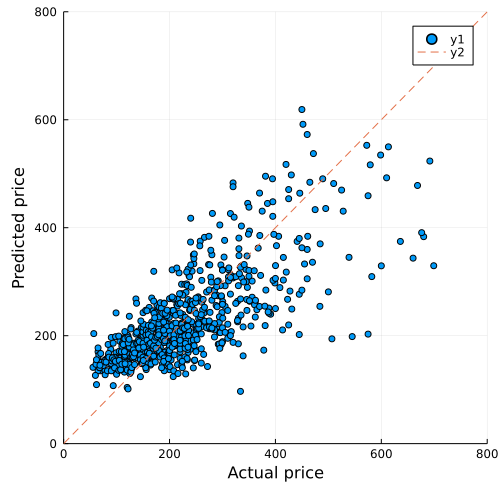

In [11]:
using VMLS
D = house_sales_data();
D
price = D["price"]
area = D["area"]
beds = D["beds"]
v = 54.4017
beta = [ 148.7251, -18.8534 ];
predicted = v .+ beta[1] * area + beta[2] * beds;
using Plots
#x = randn(100)
#y = randn(100)
#scatter(x, y, xlims = (0,1), ylims = (0,1 ))
scatter(price, predicted, lims = (0,800))
plot!([0, 800], [0, 800], linestyle = :dash)

plot!(xlims = (0,800), ylims = (0,800), size = (500,500))
plot!(xlabel = "Actual price", ylabel = "Predicted price")

# 1010 norm and distance
## clustering

In [7]:
using LinearAlgebra
x = [2, -1, 2]
norm(x) # measure size
sqrt(x'*x) # inner product
sqrt(sum(x.^2)) # component-wise x

# distance
u = [1.8, 2.0, -3.7, 4.7];v = [0.6, 2.1, 1.9, -1.4];w = [2.0, 1.9, -4.0, 4.6];
norm(u-v), norm(u-w), norm(v-w)

(8.36779540858881, 0.3872983346207417, 8.532877591996735)

In [8]:
using Statistics
Jclust(x,reps,assignment) =
  mean( [norm(x[i]-reps[assignment[i]])^2 for i=1:length(x)] )
x = [ [0,1], [1,0], [-1,1] ]
reps = [ [1,1], [0,0] ] # center of each cluster(G 只有兩個組)
assignment = [1,2,1]
Jclust(x,reps,assignment)

2.0

In [14]:
group_number = [rand(1:3) for i =1:5]
println("The group index: ", group_number)
group_1 = [i for i=1:5 if group_number[i] == 1]
println("index of group 1: ", group_1)
group_2 = [i for i=1:5 if group_number[i] == 2]
println("index of group 2: ", group_2)
group_3 = [i for i=1:5 if group_number[i] == 3]
println("index of group 3: ", group_3)

function kmeansfunction(x, k; maxiters = 100, tol = 1e-5)  # tolerant: Z不再改變的幅度
N = length(x) # number of pts to be cluster
n = length(x[1]) # the dim
distances = zeros(N)  # used to store the distance of each point to the nearest representative.
reps = [zeros(n) for j=1:k]  # used to store representatives.

# 'assignment' is an array of N integers between 1 and k.
# The initial assignment is chosen randomly.
assignment = [ rand(1:k) for i in 1:N ]
Jprevious = Inf  # used in stopping condition
for iter = 1:maxiters
    
    # Cluster j representative is average of points in cluster j.
    for j = 1:k
        group = [i for i=1:N if assignment[i] == j]
        reps[j] = sum(x[group]) / length(group);
    end;
    
    # For each x[i], find distance to the nearest representative and its group index.
    for i = 1:N
        (distances[i], assignment[i]) =
        findmin([norm(x[i] - reps[j]) for j = 1:k])
    end;
    
    # Compute clustering objective.
    J = norm(distances)^2 /  N # distance to the cluster center
    
    # Show progress and terminate if J stopped decreasing.
    println("Iteration ", iter, ": Jclust = ", J, ".")
    if iter > 1 && abs(J - Jprevious) < tol * J
        return assignment, reps
    end
    Jprevious = J
end

end

X = vcat( [ 0.3*randn(2) for i = 1:100 ],
[ [1,1] + 0.3*randn(2) for i = 1:100 ],
[ [1,-1] + 0.3*randn(2) for i = 1:100 ] )
using Plots
scatter([x[1] for x in X], [x[2] for x in X])
plot!(legend = false, grid = false, size = (500,500),xlims = (-1.5,2.5), ylims = (-2,2))

using LinearAlgebra
assignment, reps = kmeansfunction(X, 3)

The group index: [2, 1, 1, 3, 2]
index of group 1: [2, 3]
index of group 2: [1, 5]
index of group 3: [4]
Iteration 1: Jclust = 0.9874845511646804.
Iteration 2: Jclust = 0.2784641035794091.
Iteration 3: Jclust = 0.18461801218231652.
Iteration 4: Jclust = 0.18323671568094047.
Iteration 5: Jclust = 0.18304336589683842.
Iteration 6: Jclust = 0.18304336589683842.


([2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [[0.9763659672403527, -1.011095947130752], [-0.07077120628293083, 0.007578230878139962], [1.0011517016376381, 0.9774307707817326]])

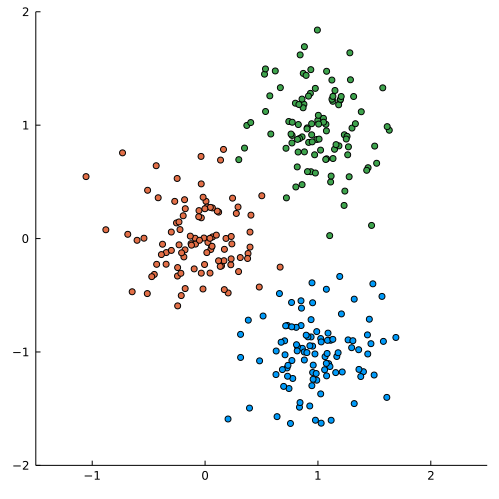

In [15]:
k = 3
N = length(X)
grps  = [[X[i] for i=1:N if assignment[i] == j] for j=1:k]
scatter([c[1] for c in grps[1]], [c[2] for c in grps[1]])
scatter!([c[1] for c in grps[2]], [c[2] for c in grps[2]])
scatter!([c[1] for c in grps[3]], [c[2] for c in grps[3]])
plot!(legend = false, grid = false, size = (500,500),xlims = (-1.5,2.5), ylims = (-2,2))

# 1016 gram smith & orgonormal

In [1]:
using LinearAlgebra
a1 = [0,0,-1]; a2 = [1,1,0]/sqrt(2); a3 = [1,-1,0]/sqrt(2);
norm(a1), norm(a2), norm(a3)
a1'*a2, a1'*a3, a2'*a3

x = [1,2,3]
beta1 = a1'*x; beta2 = a2'*x; beta3 = a3'*x; # imperative
x_orthogonal_expansion = beta1*a1 + beta2*a2 + beta3*a3

3-element Vector{Float64}:
 0.9999999999999999
 1.9999999999999996
 3.0

In [1]:
function gram_schmidt(a; tol = 1e-10)
    q = []
    for i = 1:length(a)
        qtilde = a[i]
        for j = 1:i-1
            qtilde -= (q[j]'*a[i]) * q[j]
        end
        
        if norm(qtilde) < tol
            println("Vectors are linearly dependent.")
            return q
            return ""
        end
        push!(q, qtilde/norm(qtilde))
    end;
    return q # all the orthonormal vectors in a sets
end
a = [ [2,0,0], [0,1,2], [1, 2,3] ]
q = gram_schmidt(a)

UndefVarError: UndefVarError: norm not defined